# Galaxy zoo
The images are stored in the ```galaxy_zoo_images``` directory. We are going to load some galaxies from this, and point to some tutorials for how to handle image datasets in tensorflow.

First we will import some useful libraries for viewing images and loading data.

In [1]:
import PIL
import PIL.Image
import pathlib

Now we will define a pathlib object. These kind of objects make handling paths to files much easier, and are better than defining a string that defines the path.

In [2]:
image_dir = pathlib.Path('galaxy_zoo_images')

One of the nice things we can do with a pathlib object is ```glob``` all of the files that match a certain pattern in the directory. This will return a python generator that we can cast to a list of files. This list will contain all the files (as path objects) in the ```image_dir``` that match the pattern we specify (in this case ```'.jpg'``` ie) any jpg file).

In [3]:
images = image_dir.glob('*.jpg')
image_list = list(images)
print(image_list[:2])
print(f'There are {len(image_list)} training objects.')

[PosixPath('galaxy_zoo_images/523554.jpg'), PosixPath('galaxy_zoo_images/704147.jpg')]
There are 24275 training objects.


Now you can plot as many galaxy images as you want.

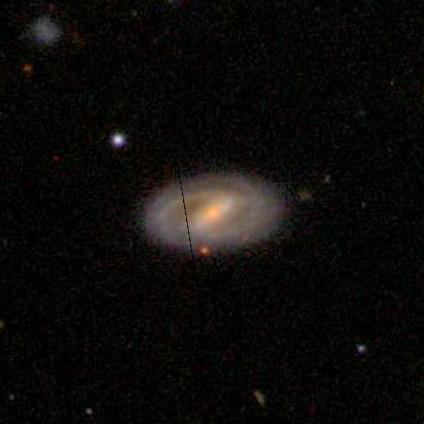

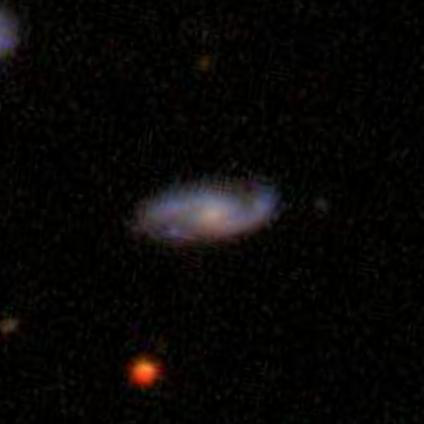

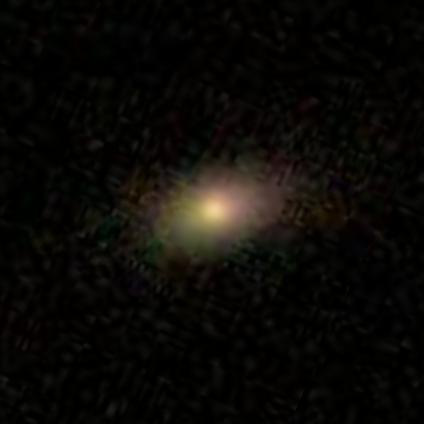

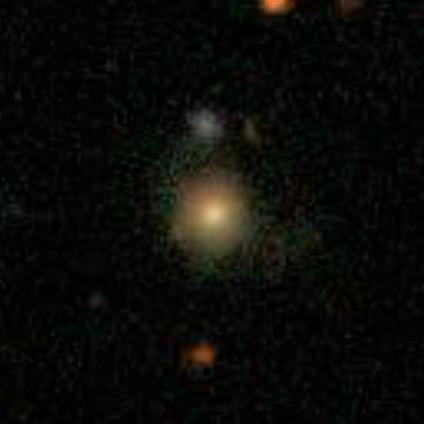

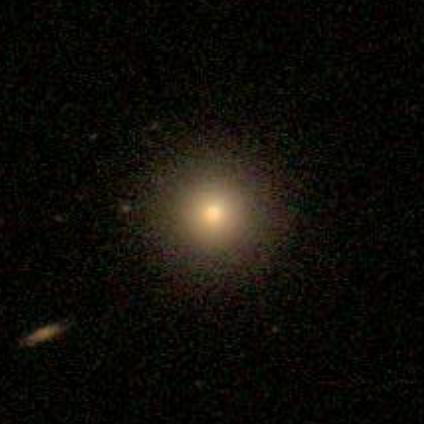

In [4]:
n_plot = 5
for i in range(n_plot):
    display(PIL.Image.open(str(image_list[i])))

Now that you have a feel for the look of these images, we can convert them to numpy arrays, and take a look at their size.

In [5]:
image = PIL.Image.open(str(image_list[0]))

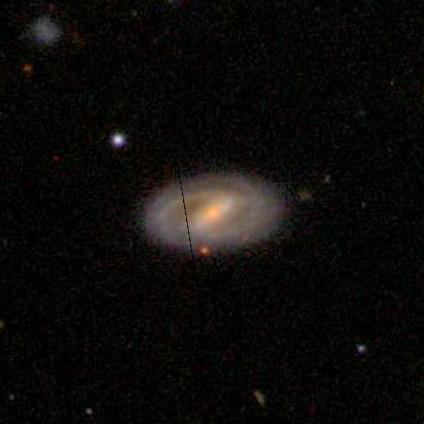

In [6]:
image

In [7]:
import numpy as np
np_image = np.array(image)
n_pixels_x, n_pixels_y, c = np_image.shape
print(f'The image is {n_pixels_x} pixels by {n_pixels_y} pixels with {c} channels.')

The image is 424 pixels by 424 pixels with 3 channels.


These images are very large, and this can cause problems if you are restricted by memory. A simple solution to this is to resize the image, such that it is smaller. This will obviously reduce the amount of information contained in the image, but as long as you justify the size of the image you choose, we won't complain. If you decide to rescale the images, you should save them as your own dataset, rather than reloading and resizing every time!

In the following we demonstrate how this resizing can be done.

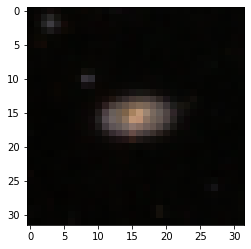

In [8]:
import matplotlib.pyplot as plt
from skimage.transform import resize
resized = resize(np_image, (32, 32))
plt.imshow(resized)

The task for this project is to classify these images as described in the README. We aren't going to tell you much more about these images, except to say that they are rotationally symmetric, and have different levels of bluriness.

In the next cells we will load the different labels that you will be using.

In [9]:
import pandas as pd
# Another nice feature of pathlib objects is that the / operator will join strings as directories
labels = pd.read_csv(image_dir / 'exercise_1_labels.csv')

In [10]:
labels = labels.set_index('GalaxyID')
labels.head()

,Class1.1,Class1.2,Class1.3
GalaxyID,,,
100090,1.0,0.0,0.0
100134,0.0,1.0,0.0
100237,0.0,1.0,0.0
100263,0.0,1.0,0.0
100322,0.0,1.0,0.0


We need to take the labels for this dataset and order them in the same way as the list of images we have grabbed from the image folder. We can get the ID of each file with the ```.stem``` attribute of the path object and cast it to an int so that it matches the id in the dataframe.

In [11]:
# First get the order
ordering = [int(f.stem) for f in image_list if int(f.stem) in labels.index]
# Then make the above list
numpy_labels = labels.loc[ordering].to_numpy()

In [12]:
import tensorflow as tf 
labels = tf.convert_to_tensor(numpy_labels)
image_list = [str(f) for f in image_list] 
image_paths = tf.convert_to_tensor(image_list, dtype=tf.string)
dataset = tf.data.Dataset.from_tensor_slices((image_paths, labels))

Using the tensorflow data API allows fine control over how datatsets are built and handled. In particular with images (which typically make for large datasets) the handling of the data becomes very important. If you want to, you can use this API to build the dataset on which you train, and there is a good tutorial on this for images [here](https://www.tensorflow.org/tutorials/load_data/images#using_tfdata_for_finer_control). Otherwise you can load the images as numpy arrays, and train models in exactly the same way we have for the rest of the course.

The other label dataframes can be loaded in the same way. But note that the labels in these arrays are quite different!